In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
water_data = pd.read_csv('water_data_outlier_cleaned.csv')

# DATA INFORMATION

In [77]:
water_data.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target
0,8.332988,8.350000e-05,8.605777,122.799772,3.710000e-52,3.434827,0,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.270000e-15,332.118789,0
1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,1,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.020000e-07,284.641984,0
2,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,2,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,0
3,8.132455,5.526229e-02,4.288010,94.993978,2.920000e-52,1.770221,2,0.021703,1.111893,0.247116,0.426404,NaN,1.706755,3.083768e-02,266.079565,0
4,7.258203,6.110000e-09,9.261676,182.242341,4.400000e-224,0.416478,0,0.047803,1.016196,0.298093,3.144199,114.551427,2.325094,6.020000e-16,214.553104,0


In [78]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502121 entries, 0 to 502120
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      492666 non-null  float64
 1   Iron                    498436 non-null  float64
 2   Nitrate                 493207 non-null  float64
 3   Chloride                487587 non-null  float64
 4   Lead                    499221 non-null  float64
 5   Zinc                    489073 non-null  float64
 6   Color                   502121 non-null  int64  
 7   Turbidity               497856 non-null  float64
 8   Fluoride                486310 non-null  float64
 9   Copper                  485552 non-null  float64
 10  Odor                    487484 non-null  float64
 11  Sulfate                 485820 non-null  float64
 12  Chlorine                497293 non-null  float64
 13  Manganese               492075 non-null  float64
 14  Total Dissolved Soli

([<matplotlib.patches.Wedge at 0x16c858520>,
 [Text(-1.0658998315536878, 0.27176745407392, 'Bad(0)'),
  Text(1.0658998315536878, -0.2717674540739196, 'Good(1)')],
 [Text(-0.5813999081201933, 0.14823679313122906, '92.054%'),
  Text(0.5813999081201934, -0.14823679313122887, '7.946%')])

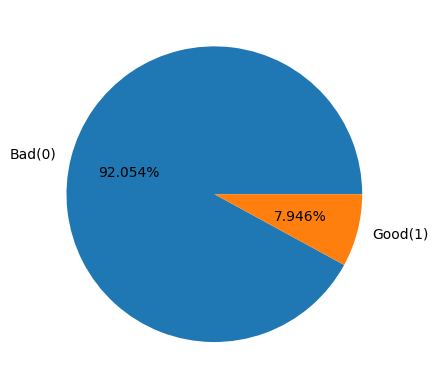

In [79]:
plt.pie(
    water_data['Target'].value_counts(),
    labels = ['Bad(0)','Good(1)'],
    autopct = "%1.3f%%",
)

# Filling Null Value

In [80]:
water_data.isna().sum()

pH                         9455
Iron                       3685
Nitrate                    8914
Chloride                  14534
Lead                       2900
Zinc                      13048
Color                         0
Turbidity                  4265
Fluoride                  15811
Copper                    16569
Odor                      14637
Sulfate                   16301
Chlorine                   4828
Manganese                 10046
Total Dissolved Solids      137
Target                        0
dtype: int64

In [81]:
for column in water_data:
  mean_value = water_data[column].mean()
  water_data[column].fillna(mean_value, inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_1173/383890078.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[column].fillna(mean_value, inplace = True)


In [82]:
water_data.isna().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Target                    0
dtype: int64

In [83]:
water_data.corr()['Target'].sort_values()

pH                       -0.027698
Zinc                      0.012573
Lead                      0.021227
Sulfate                   0.060495
Total Dissolved Solids    0.075806
Fluoride                  0.090118
Nitrate                   0.092714
Chlorine                  0.097044
Iron                      0.106874
Color                     0.107917
Manganese                 0.108017
Turbidity                 0.115555
Copper                    0.125379
Chloride                  0.136286
Odor                      0.138641
Target                    1.000000
Name: Target, dtype: float64

In [84]:
X = water_data.drop('Target', axis = 1)
y = water_data['Target']

In [85]:
X.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Chlorine',
       'Manganese', 'Total Dissolved Solids'],
      dtype='object')

In [86]:
X.corrwith(y).sort_values()

pH                       -0.027698
Zinc                      0.012573
Lead                      0.021227
Sulfate                   0.060495
Total Dissolved Solids    0.075806
Fluoride                  0.090118
Nitrate                   0.092714
Chlorine                  0.097044
Iron                      0.106874
Color                     0.107917
Manganese                 0.108017
Turbidity                 0.115555
Copper                    0.125379
Chloride                  0.136286
Odor                      0.138641
dtype: float64

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [90]:
y_train.value_counts()

Target
0    369775
1     31921
Name: count, dtype: int64

In [91]:
model = RandomForestClassifier()

In [92]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_pred = model.predict(X_test)

In [94]:
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score

accuracy = accuracy_score (y_test,y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print(f"F1 Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

F1 Accuracy: 0.9569
F1 Score: 0.7655
Precision: 0.6742
Recall: 0.8855
Balanced Accuracy: 0.9243


•Precision: The increase in precision suggests that the model is better at avoiding false positives, making more accurate predictions for potable water (class 1). This is important for ensuring safety and reducing the number of incorrect positive predictions.
	
•Recall: The slight decrease in recall compared to the SMOTE-only approach suggests that the model might be missing a few more positive cases. However, the high precision helps mitigate the impact of this trade-off.
	
•F1 Score and Balanced Accuracy: The F1 Score reflects a balanced approach between precision and recall, and the balanced accuracy indicates strong overall performance across both classes. The balanced accuracy improvement suggests that removing certain features and handling outliers has helped the model generalize better.

### Dump the model

In [95]:
from joblib import dump

dump(model,'RandomForest_WQT_NO_OL.joblib')

['RandomForest_WQT_NO_OL.joblib']

# SMOTE

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
smote = SMOTE(random_state = 42)

In [62]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [63]:
y_train_smote.value_counts()

Target
0    369775
1    369775
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x14e38f370>,
 [Text(-1.1, 1.3471114790620887e-16, 'Bad(0)'),
  Text(1.1, -2.6942229581241775e-16, 'Good(1)')],
 [Text(-0.6, 7.347880794884119e-17, '50.000%'),
  Text(0.6, -1.4695761589768238e-16, '50.000%')])

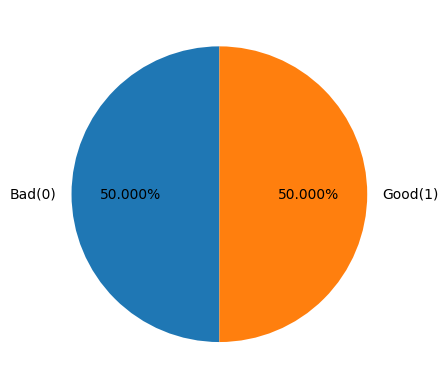

In [64]:
plt.pie(
    y_train_smote.value_counts(),
    labels = ['Bad(0)', 'Good(1)'],
    startangle=90,
    autopct = "%1.3f%%",
)

In [65]:
rf_model = RandomForestClassifier()

In [66]:
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [67]:
y_pred_smote = rf_model.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred_smote)

0.9396066716455066

In [69]:
# F1 Score
f1 = f1_score(y_test, y_pred_smote)

# Precision
precision = precision_score(y_test, y_pred_smote)

# Recall
recall = recall_score(y_test, y_pred_smote)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_smote)

# Display the results
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

F1 Score: 0.7065
Precision: 0.5755
Recall: 0.9149
Balanced Accuracy: 0.9283


•Precision: The decrease in precision indicates that there are more false positives—more non-potable water being incorrectly classified as potable. This is a trade-off for achieving higher recall.

•Recall: The increase in recall means that the model is better at identifying actual potable water cases. This is especially important for applications where it’s crucial to catch as many positive cases as possible.

•F1 Score and Balanced Accuracy: The F1 Score reflects a trade-off between precision and recall, and its decrease compared to hybrid sampling suggests that the improvement in recall comes at the cost of precision. The balanced accuracy is still very high, indicating strong overall performance.